# Trabalho Equipe 2

- Disciplina: Data Mining
- Pessoas: Fernando Oliveira, Filipi Antunes, Karla Aleluia, Ricardo Gomes
- Data: 30/05/2021

# Titanic

- Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1.502 dos 2.224 passageiros e tripulantes. Taxa de sobrevivência de 32% traduzida.
- Uma das razões que o naufrágio ocasionou tamanha perda de vidas foi a falta de botes salva-vidas para os passageiros e tripulantes.
- Embora houvesse algum elemento de sorte envolvido em sobreviver ao naufrágio, alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta.

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_braian.csv")

##  #1 - Conhecimento da Base

In [3]:
#Verificando variáveis
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Descrição dos atributos:


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1olm{background-color:#FFF;border-color:inherit;color:rgba(0, 0, 0, 0.7);text-align:left;vertical-align:top}
.tg .tg-0crt{background-color:#efefef;border-color:inherit;color:rgba(0, 0, 0, 0.4);font-weight:bold;text-align:left;
  vertical-align:top}
.tg .tg-h3mt{background-color:#FFF;color:rgba(0, 0, 0, 0.7);text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0crt"><span style="font-weight:500">Variável</span></th>
    <th class="tg-0crt"><span style="font-weight:500;font-style:inherit">Definição</span></th>
    <th class="tg-0crt"><span style="font-weight:500">Chaves</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-1olm"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">survived</span></td>
    <td class="tg-1olm"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">Sobrevivência</span></td>
    <td class="tg-1olm"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">0 = Não, 1 = Sim</span></td>
  </tr>
  <tr>
    <td class="tg-1olm"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">pclass</span></td>
    <td class="tg-1olm"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">Classe do ingresso</span></td>
    <td class="tg-1olm"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">1 = primeira, 2 = segunda, 3 = terceira</span></td>
  </tr>
  <tr>
    <td class="tg-1olm"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">sex</span></td>
    <td class="tg-1olm"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">Sexo</span></td>
    <td class="tg-1olm"></td>
  </tr>
  <tr>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">Age</span></td>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">Idade em anos</span></td>
    <td class="tg-h3mt"></td>
  </tr>
  <tr>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">sibsp</span></td>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF"># </span><span style="font-style:inherit;background-color:#FFF">de irmãos / cônjuges a bordo do Titanic</span></td>
    <td class="tg-h3mt"></td>
  </tr>
  <tr>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">parch</span></td>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF"># </span><span style="font-style:inherit;background-color:#FFF">de pais / filhos a bordo do Titanic</span></td>
    <td class="tg-h3mt"></td>
  </tr>
  <tr>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">ticket</span></td>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">Número do ingresso</span></td>
    <td class="tg-h3mt"></td>
  </tr>
  <tr>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">fare</span></td>
    <td class="tg-h3mt">Tarifa do passageiro</td>
    <td class="tg-h3mt"></td>
  </tr>
  <tr>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">cabin</span></td>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">Número da cabine</span></td>
    <td class="tg-h3mt"></td>
  </tr>
  <tr>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">embarked</span></td>
    <td class="tg-h3mt">Porto de embarcação</td>
    <td class="tg-h3mt"><span style="font-weight:400;font-style:inherit;color:rgba(0, 0, 0, 0.7);background-color:#FFF">C = Cherbourg, Q = Queenstown, S = Southampton</span></td>
  </tr>
</tbody>
</table>

In [4]:
#Dimensoes do dataframe
print('Quantidade de registros e atributos:', train.shape)

Quantidade de registros e atributos: (891, 12)


In [5]:
#Verificando o dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


#### O dataframe possui 891 registros, 11 atributos e 1 alvo (Survived)

In [6]:
#Exibindo dados estatísticos
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


Distribuição dos valores numéricos das variáveis nas amostras:

- Observava-se que 38% dos passageiros da amostra sobreviveram.
- O intervalo de idade é de 0.42 a 80 anos.
- 75% da amostra foi acompanhado de 1 irmão ou conjuge.

In [7]:
#Exibindo dados estatísticos das variáveis categóricas 
train.describe(include = object)

,Name,Sex,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,204,889
unique,891,2,681,248,147,3
top,"Cunningham, Mr. Alfred Fleming",male,CA. 2343,08.05,B96 B98,S
freq,1,577,7,43,4,644


- Observa-se que a maioria dos passageiros eram do sexo masculino (577 male).
- Observa-se que a maioria dos passageiros embarcaram em Southampton.

In [8]:
#Visualizando os dados
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,518.625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,300.708,NaN,C


In [9]:
#transformação da variável Fare para float
train["Fare"] = train["Fare"].apply(pd.to_numeric, errors='coerce')

In [10]:
#Verificando o dataframe após alteração de tipo de dados para variável Fare
train["Fare"].dtype

dtype('float64')

## #2 - Pré-Processamento
- ANÁLISES UNIVARIADA E BIVARIADA/MULTIVARIADA

##### - Analisando as variáveis categóricas

##### Sexo

In [11]:
#Quantidade de passageiros por tipo de sexo
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [12]:
#Proporção de passageiros por tipo de sexo
train['Sex'].value_counts(dropna = False)/train.shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Os passageiros de sexo masculino representavam cerca de 65% do total de embarcados.

In [13]:
#Proporção media de sobreviventes por sexo
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Dentre as mulheres que embarcaram, 74% sobreviveram e dentre os homens que embarcaram o percentual foi de 19% de sobreviventes.

Text(0.5, 1.0, 'Índice de Sobrevivência por Sexo')

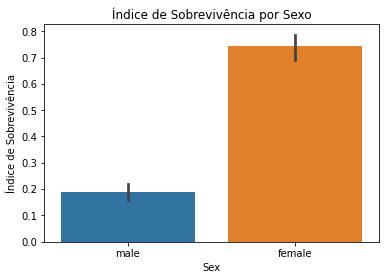

In [14]:
#Gráfico de taxa de sobrevivência por sexo
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Índice de Sobrevivência')
plt.title('Índice de Sobrevivência por Sexo')

### As mulheres que sobreviveram (74%) estavam distribuídas em qual classe?

In [15]:
#Criando dataframe somente de mulheres
mulheres = train[(train['Sex'] == 'female')]

In [16]:
#Proporção media de sobreviventes por sexo feminino e classe
mulheres[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.968085
1,2,0.921053
2,3,0.500000


Text(0.5, 1.0, 'Índice de Sobrevivência de Mulheres por Classe')

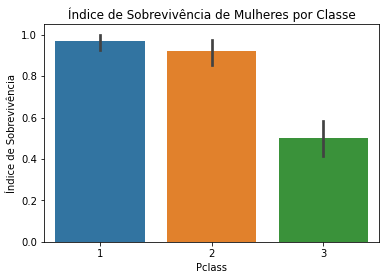

In [17]:
#Gráfico de taxa de sobrevivência por sexo feminino e classe
sns.barplot(x = 'Pclass', y ='Survived', data = mulheres)
plt.ylabel('Índice de Sobrevivência')
plt.title('Índice de Sobrevivência de Mulheres por Classe')

Ao analisar somente os passageiros do sexo feminino, observa-se que aproximadamente dos 97% que sobreviveram foram os da primeira classe.

### Dos 18% dos homens sobreviventes quantos eram crianças?

In [18]:
#Criando dataframe somente para homens
homens = train[(train.Sex == 'male')]

In [19]:
#Criando variavel Maior_Idade
homens['Maior_Idade']=1

In [20]:
#Atribuindo valor padrão para Maior_Idade menor igual a 16 anos
homens.loc[homens.Age <= 16, 'Maior_Idade'] = 0

In [21]:
#Proporção media de sobreviventes por Maior_Idade
homens[['Maior_Idade', 'Survived']].groupby('Maior_Idade', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Maior_Idade,Survived
0,0,0.431373
1,1,0.165399


Text(0.5, 1.0, 'Índice de Sobrevivência por Maior Idade')

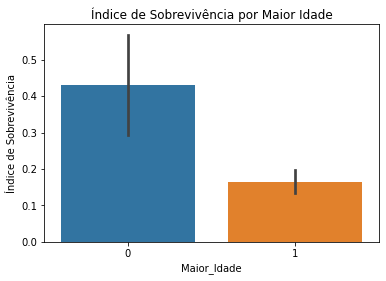

In [22]:
#Gráfico de taxa de sobrevivência por maior idade
sns.barplot(x = 'Maior_Idade', y ='Survived', data = homens)
plt.ylabel('Índice de Sobrevivência')
plt.title('Índice de Sobrevivência por Maior Idade')

Dos 18% dos passageiros que sobreviveram, 43% possuiam idade menor igua a 16 anos (crianças).

### Relacionar as variáveis classe e sexo para compreender a influência desses atributos na sobrevivência dos passageiros

In [23]:
#Proporção media de sobreviventes por Sexo e Classe de Ingresso
train[['Sex', 'Pclass','Survived']].groupby(['Pclass','Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


Observa-se que para todas as classes de ingresso, os percentuais de passageiros de sexo feminino foram maiores. Na primeira classe 96% contra 36% para os do sexo masculino; na segunda classe, 92% contra os 16% do sexo masculino; e para a terceira classe, 50% contra os 13% do sexo masculino.

### Qual a proporção de homens e mulheres na 1ª classe. Quantos sobreviveram?

In [24]:
#Criando dataframe somente para primeira classe
primeira_classe = train[(train.Pclass == 1)]

In [25]:
#Proporção media de sobreviventes para primeira classe
primeira_classe[['Pclass', 'Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Pclass,Survived
0,female,1.0,0.968085
1,male,1.0,0.368852


Ao verificar somente os passageiros da primeira classe, observa-se que 97% das mulheres sobreviveram. Em relação aos homens, 37% sobreviveram.

##### Tipo de classe de ingresso

In [26]:
#Proporção de passageiros por tipo de Classe do ingresso
train['Pclass'].value_counts(dropna = False)/train.shape[0]

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [27]:
#Media de sobreviventes por Classe do ingresso
train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Índice de Sobrevivência Por Classe de Ingresso')

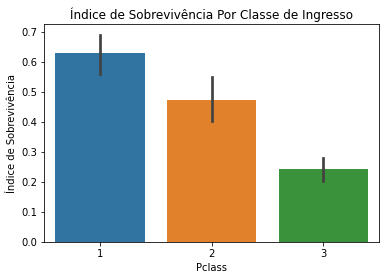

In [28]:
#taxa de Sobrevivência por Classe do ingresso
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Índice de Sobrevivência')
plt.title('Índice de Sobrevivência Por Classe de Ingresso')

O índice de sobrevivência dos passageiros foram diferentes de acordo com a Classe de Ingresso. Apesar de os passageiros da terceira classe fossem a maioria (cerca de 55%), os  passageiros da primeira classe proporcionalmente foram os que mais  sobreviveram (63% da categoria).

Text(0.5, 1.0, 'Chances de Sobrevivência por Sexo and Classe de Ingresso')

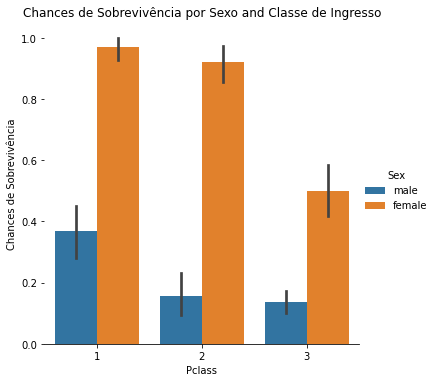

In [29]:
# Taxa de Sobrevivência por Sexo e por Classe de Ingresso
g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Chances de Sobrevivência')
plt.title('Chances de Sobrevivência por Sexo and Classe de Ingresso')

Os passageiros do sexo masculino da primeira classe tiveram mais do que o dobro do índice de sobrevivencia do que os passageiros das demais classes.
As passageiras das classes 1 e 2 tiveram praticamente os mesmos índices de sobrevivência e o aproximadamente o dobro do índice de sobrevivência das passageiras da terceira categoria.

##### Local de embarque

In [30]:
#Total passageiros embarcados por local de embarque
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Existem 2 valores faltantes neste atributo.

Text(0.5, 1.0, 'Chances de Sobrevivência Por Local de Embarque')

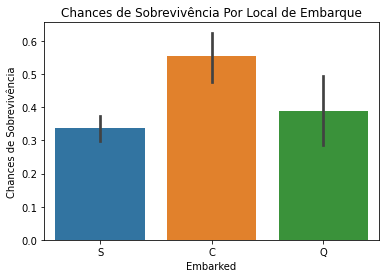

In [31]:
#Taxa de Sobrevivência por local de embarque
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Chances de Sobrevivência')
plt.title('Chances de Sobrevivência Por Local de Embarque')

Os passageiros embarcados em Cherbourg tiveram o maior índice de sobrevivência, embora a maioria dos passageiros tenham embarcado em Southampton.

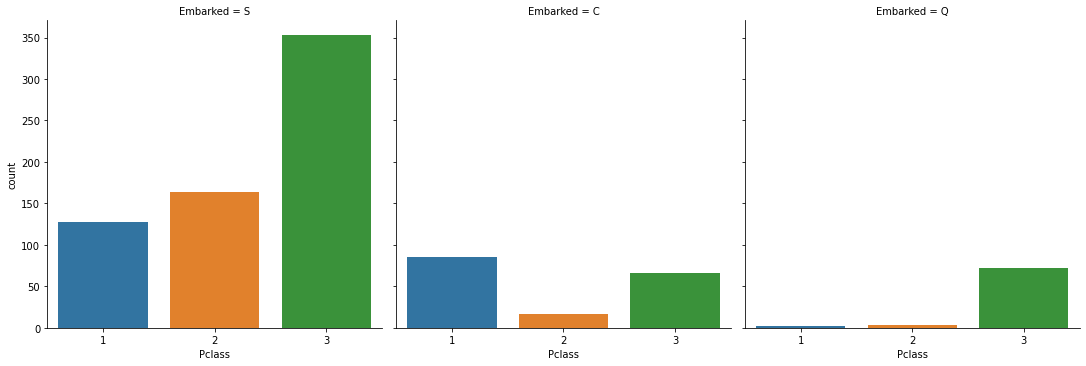

In [32]:
#Total de passageiros embarcados por local de embarque e por classe de ingresso
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

- A grande maioria dos passageiros embarcaram em Southampton. Os passageiros da primeira classe foram a maioria dentre os que  embarcaram em Cherbourge a minoria dos embarcados nos outros locais.

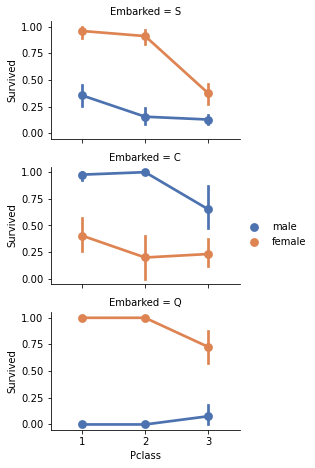

In [33]:
#Chances de sobrevivência considerando Sexo, Classe do Ingresso e por local de Embarque
grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

- Os gráficos indicam que ao contrário da tendência geral onde o maior índice de sobrevivência está no sexo feminino, o índice de sobrevivencia dos passageiros do sexo masculino que embarcaram em C foi muito superior ao índice de sobrevivência dos passageiros de sexo feminino que embarcaram lá.

##### - Analisando as Variáveis Numéricas

<AxesSubplot:>

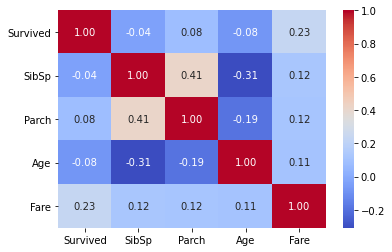

In [34]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

Fare é o atributo que tem a maior correlação positiva com a variável alvo Survived.

array([[<AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>],
       [<AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<AxesSubplot:xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>]], dtype=object)

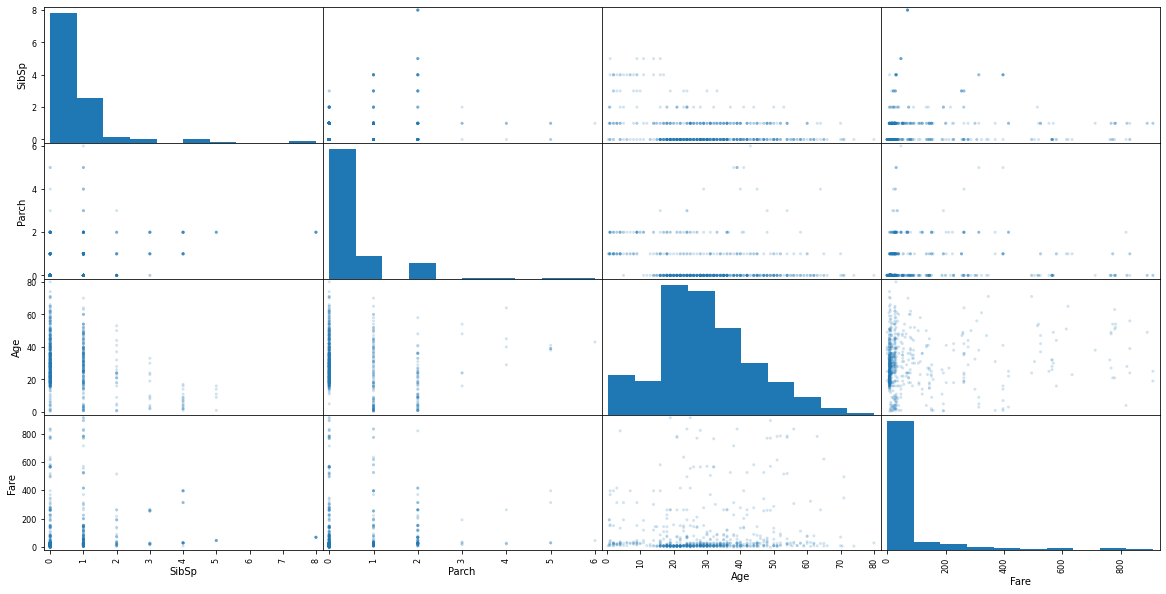

In [35]:
pd.plotting.scatter_matrix(train[['SibSp', 'Parch', 'Age', 'Fare']], alpha=0.2, figsize=[20,10])

Passageiros jovens, não acompanhados e que pagaram as menores tarifas eram a grande maioria a bordo. Todos atributos têm em comun uma distribuição assimétrica positiva indicando a presença de outiliers.

In [36]:
#Quantidade percentual de irmãos/cônjuges a bordo
train['SibSp'].value_counts(dropna = False)/train.shape[0]

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

Text(0.5, 1.0, 'Índice de Sobrevivência por qtd de irmãos/cônjuges a bordo do Titanic')

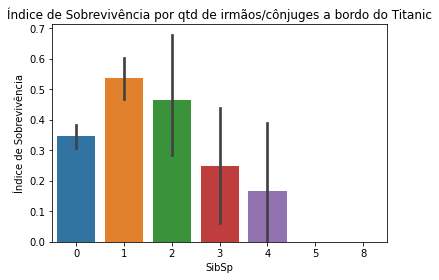

In [37]:
#Taxa de Sobrevivência por quantidade de irmãos/cônjuges a bordo 
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Índice de Sobrevivência')
plt.title('Índice de Sobrevivência por qtd de irmãos/cônjuges a bordo do Titanic')

- Apesar de serem a grande maioria (cerca de 68% do total), o índice de sobrevivência dos passageiros que não tinham irmão ou cônjugue a bordo foi inferior ao índice de sobrevivencia dos passageiros que tinham 1 ou 2 irmãos ou cônjugues a bordo. Os passageiros que tinham 3 ou mais irmãos ou conjugues a bordo tiveram as menores índices de sobrevivência.

In [38]:
#Quantidade percentual de pais/filhos a bordo 
train['Parch'].value_counts(dropna = False)/train.shape[0]

0    0.760943
1    0.132435
2    0.089787
3    0.005612
5    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

Text(0.5, 1.0, 'Índice de Sobrevivência por qtd de pais / filhos a bordo do Titanic')

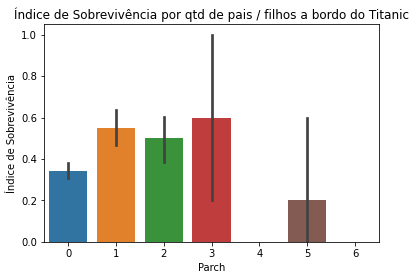

In [39]:
#Taxa de Sobrevivência por # de pais / filhos a bordo do Titanic
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Índice de Sobrevivência')
plt.title('Índice de Sobrevivência por qtd de pais / filhos a bordo do Titanic')

- Apesar de serem a grande maioria, os passageiros que não tinham pais ou filhos a bordo(cerca de 76% do total) tiveram índice de sobrevivência menor em comparação aos passageiros que tinham 3,1 ou 2 pais ou filhos nessa ordem. Os passageiros que tinham 4 ou 6 pais ou filhos a bordo possivelmente não sobreviveram.

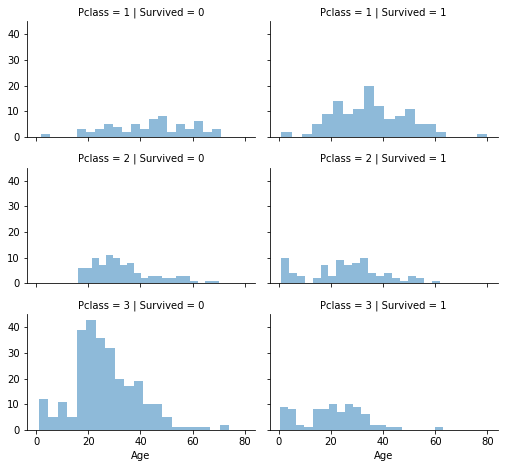

In [40]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- O grupo de passageiro que mais teve o índice de sobrevicência baixo foram os jovens da terceira classe com idade aproximada entre 18 a 40 anos. Já entre a primeira classe, a maioria sobreviveu e observa-se uma distribuição normal entre os sobreviventes em relação a idade.

##### Tratamento de Dados Faltantes
- Derivação de atributos
- Remoção de atributos
- Estimação direta

In [41]:
#Verificação de valores faltantes em percentual
train.isnull().sum().sort_values(ascending = False)/train.shape[0]

Cabin          0.771044
Age            0.198653
Fare           0.025814
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
dtype: float64

In [42]:
#verificando a variavel Ticket
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [43]:
#verificando a variavel Cabin
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Há 4 variáveis com valores faltantes : Cabin, Age, Fare e Embarked. Os dados faltantes das variáveis Age,Fare E Embarked serão preenchidas utilizando os valores da média, mediana e moda respectivamente.
O atributo Cabin tem 77% de valores faltantes. Um número de cabine tem um formato similar a 'C123' e a letra refere-se ao deck. Vamos remover a variável e criar um novo atributo, que contém a letra referente ao deck. Posteriormente, converteremos o atributo em uma variável numérica. Os valores ausentes serão convertidos para 8.
A variável Ticket apesar de não ter dados faltantes será descartada por conter muitos valores únicos.

In [44]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [45]:
#Drop das variáveis Cabin e Ticket do dataset
train = train.drop(['Cabin', 'Ticket'], axis = 1)

Criação de Atributo Title (Título da Pessoa)

In [46]:
data = [train]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)

- A partir de uma lista de títulos encontrados na variável Name, fizemos um tratamento da informação para agrupar em 4 títulos mais comuns, e os mais incomuns foram colocados como Rare (seriam doutores, prefeitos, capitães, etc)
Ao final do processo, dropamos a variável Name

In [47]:
#verificando o comportamento das variáveis para decidir o que fazer com os 
#dados faltantes de Age, Fare e Embarked
train.describe(include= 'all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,868.000000,889,891.000000,891.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S,NaN,NaN
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,79.029258,NaN,6.936027,1.728395
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,163.021485,NaN,2.074282,1.030039
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.895800,NaN,8.000000,1.000000
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.400000,NaN,8.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,47.700000,NaN,8.000000,2.000000


In [48]:
#Rever
#Cálculo da moda, mediana e media das variaveis Embarked, Fare e Age respectivamente
mode = train['Embarked'].dropna().mode()[0]
median = train['Fare'].dropna().median()
mean = train['Age'].dropna().mean()
mode, median, mean

('S', 14.4, 29.69911764705882)

In [49]:
#Rever
#preenchimento dos valores faltantes das variaveis Embarked, Fare e Age  
#pela moda, mediana e media respectivamente
values = {'Embarked': mode, 'Fare': median, 'Age': mean}
train.fillna(value=values, inplace=True)

In [50]:
#Verificação de valores faltantes em percentual
train.isnull().sum().sort_values(ascending = False)/train.shape[0]

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
Deck           0.0
Title          0.0
dtype: float64

##### Tratamento de Outliers

<AxesSubplot:title={'center':'SibSp'}, xlabel='Survived'>

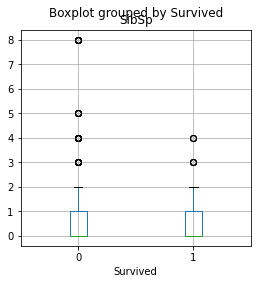

In [51]:
#boxplot da variável numérica SibSp em função da variável Survived
fig, ax = plt.subplots(figsize=(4,  4))
train.boxplot(["SibSp"], "Survived",ax)

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

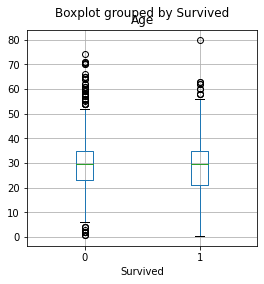

In [52]:
#boxplot da variável numérica Age em função da variável Survived
fig, ax = plt.subplots(figsize=(4,  4))
train.boxplot(["Age"], "Survived",ax)

<AxesSubplot:title={'center':'Parch'}, xlabel='Survived'>

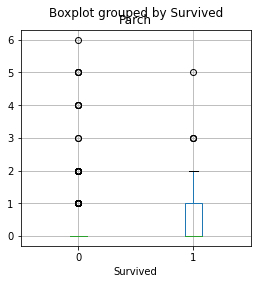

In [53]:
#boxplot da variável numérica Parch em função da variável Survived
fig, ax = plt.subplots(figsize=(4,  4))
train.boxplot(["Parch"], "Survived",ax)

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

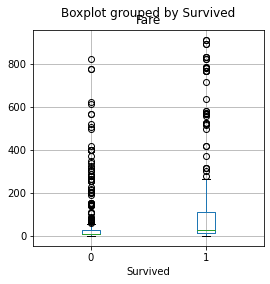

In [54]:
#boxplot da variável numérica Fare em função da variável Survived
fig, ax = plt.subplots(figsize=(4,  4))
train.boxplot(["Fare"], "Survived",ax)

<AxesSubplot:title={'center':'Deck'}, xlabel='Survived'>

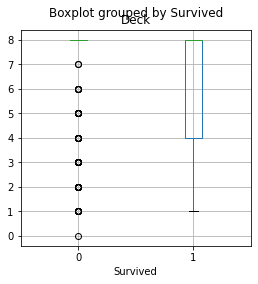

In [55]:
#boxplot da variável numérica Deck em função da variável Survived
fig, ax = plt.subplots(figsize=(4,  4))
train.boxplot(["Deck"], "Survived",ax)

Os gráficos de boxplot sugerem a existência de outliers em todos os atributos  com maior concentração na variável Survived entre os que não sobreviveram.

Aplicação da função Logaritmo sobre a  variável Fare

Text(0.5, 1.0, 'Distribuição da Variável fare')

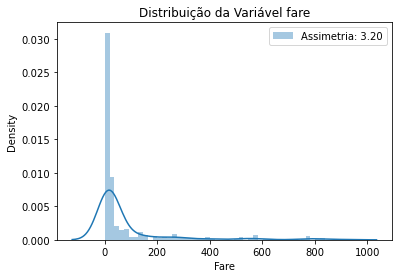

In [56]:
#Distribuição da variável Fare
sns.distplot(train['Fare'], label = 'Assimetria: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Distribuição da Variável fare')

In [57]:
#Transformação logarítimica da variável fare para reduzir a assimetria da distribuição
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Distribuição da Variável fare')

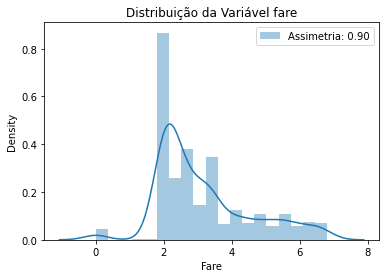

In [58]:
#Distribuição da variável Fare
sns.distplot(train['Fare'], label = 'Assimetria: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Distribuição da Variável fare')

Percebemos que com a tranformação do atributo utilizando a função logaritmica, a curva ficou mais próxima de uma distribuição normal

##### Transformação de Atributos

In [59]:
#Conversão da variável Sex para binário 0 = male e 1 = female
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

##### FamilySize (variável de apoio)

Foi criado um atributo para a partir da soma das variáveis SibSp e Parch para definir o tamanho da familia a bordo

In [60]:
#Criação de um novo atributo "tamanho da familia" = FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [61]:
train[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [62]:
#Criação de uma nova variável "Desacompanhado" = IsAlone
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

In [63]:
## Drop SibSp, Parch e FamilySize 
train = train.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)

Buscando separar em dois grupos (acompanhado e desacompanhado) é verificado se a FamilySize é > 1, se sim, estava acomanhado, se não estava sozinho e é guardado na váriavel IsAlone
Dropamos as variáveis SibSp, Parch e FamilySize ao final desse processo

##### Encoding
-Transformação dos atributos em grupos numéricos

In [64]:
#transformando a variável Embarked em númerica
ports = {"S": 0, "C": 1, "Q": 2}
data = [train]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [65]:
#agrupando a variável Age em faixa-etária
data = [train]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 7

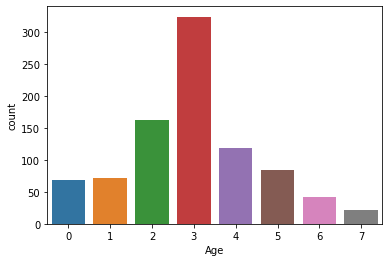

In [66]:
#Verificando o resultado do agrupamento de Age
sns.countplot('Age', data=train);

In [67]:
#como a função logaritmica já transformou a variável 
#Fare em um grupo mais equilibrado, optamos por utilizar a parte inteira como grupo
train['Fare'] = train['Fare'].astype(int)

In [68]:
train = train.reindex(columns=['PassengerId','Pclass','Sex','Age','Fare','Embarked', 'Deck', 'Title', 'IsAlone', 'Survived'])

In [69]:
#verificando o resultado final do pré-processamento.
train.head(40)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Title,IsAlone,Survived
0,1,3,0,2,1,0,8,1,0,0
1,2,1,1,4,6,1,3,3,0,1
2,3,3,1,3,2,0,8,2,1,1
3,4,1,1,4,3,0,3,3,0,1
4,5,3,0,4,2,0,8,1,1,0
5,6,3,0,3,2,2,8,1,1,0
6,7,1,0,6,6,0,5,1,1,0
7,8,3,0,0,3,0,8,4,0,0
8,9,3,1,3,2,0,8,3,0,1
9,10,2,1,1,5,1,8,3,0,1


In [70]:
train.to_csv('titanic_train.csv')